# Data analysis

### 데이터셋 로드

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

heart_df=pd.read_csv('.\data\HeartDiseaseTrain-Test.csv')

### 데이터셋 살펴보기

In [3]:
# 데이터셋 크기 확인
print(heart_df.shape)

(1025, 14)


In [4]:
# 데이터셋 구조 확인
heart_df.head()
heart_df.tail()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1
1024,54,Male,Typical angina,120,188,Lower than 120 mg/ml,ST-T wave abnormality,113,No,1.4,Flat,One,Reversable Defect,0


In [5]:
# 데이터 타입 확인
heart_df.dtypes

age                                int64
sex                               object
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar               object
rest_ecg                          object
Max_heart_rate                     int64
exercise_induced_angina           object
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy     object
thalassemia                       object
target                             int64
dtype: object

In [6]:
# 결측값 확인
heart_df.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

### 데이터셋 시각화

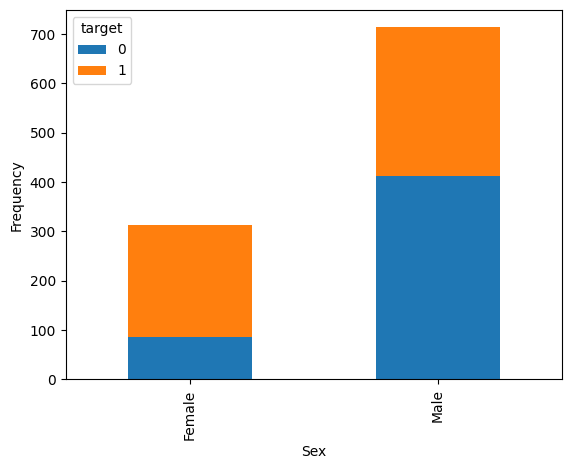

In [7]:
# 성별에 따른 생존 여부 그래프
pd.crosstab(heart_df['sex'], heart_df['target']).plot(kind='bar', stacked=True)
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

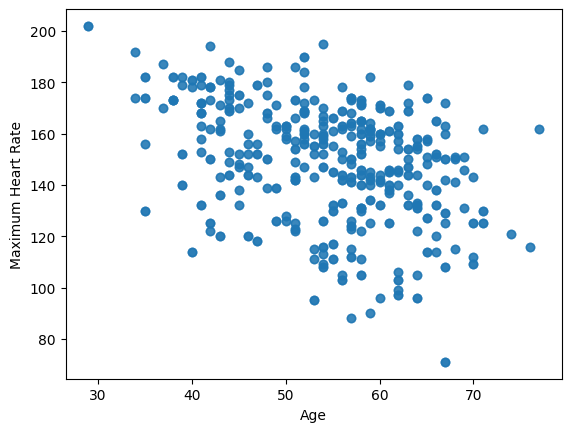

In [14]:
# 연령에 따른 최대 심박수 그래프
plt.scatter(x=heart_df['age'], y=heart_df['Max_heart_rate'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

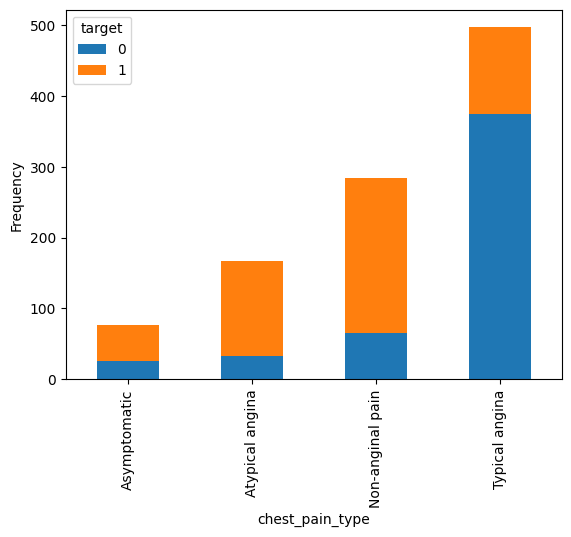

In [16]:
# 등급에 따른 심장병 발생률 그래프
pd.crosstab(heart_df['chest_pain_type'],heart_df['target']).plot(kind='bar',stacked=True)
plt.xlabel('chest_pain_type')
plt.ylabel('Frequency')
plt.show()

### 데이터셋 분석

In [17]:
# 성별에 따른 심장병 발생률
pd.crosstab(heart_df['sex'], heart_df['target'], normalize='index')

target,0,1
sex,,
Female,0.275641,0.724359
Male,0.579243,0.420757


In [18]:
# 나이에 따른 최대 심박수의 평균
heart_df.groupby('age')['Max_heart_rate'].mean()

age
29    202.000000
34    183.000000
35    160.800000
37    178.500000
38    176.000000
39    160.785714
40    155.818182
41    164.218750
42    158.500000
43    152.807692
44    168.166667
45    156.640000
46    148.565217
47    149.611111
48    165.652174
49    149.882353
50    151.285714
51    149.128205
52    167.348837
53    137.000000
54    146.132075
55    138.400000
56    145.128205
57    143.315789
58    147.250000
59    148.152174
60    149.108108
61    145.387097
62    133.324324
63    152.968750
64    133.235294
65    145.259259
66    140.120000
67    132.838710
68    139.250000
69    142.666667
70    121.500000
71    136.909091
74    121.000000
76    116.000000
77    162.000000
Name: Max_heart_rate, dtype: float64

In [21]:
# 나이에 따른 최대 심박수의 평균
heart_df.groupby('age')['Max_heart_rate'].mean()

age
29    202.000000
34    183.000000
35    160.800000
37    178.500000
38    176.000000
39    160.785714
40    155.818182
41    164.218750
42    158.500000
43    152.807692
44    168.166667
45    156.640000
46    148.565217
47    149.611111
48    165.652174
49    149.882353
50    151.285714
51    149.128205
52    167.348837
53    137.000000
54    146.132075
55    138.400000
56    145.128205
57    143.315789
58    147.250000
59    148.152174
60    149.108108
61    145.387097
62    133.324324
63    152.968750
64    133.235294
65    145.259259
66    140.120000
67    132.838710
68    139.250000
69    142.666667
70    121.500000
71    136.909091
74    121.000000
76    116.000000
77    162.000000
Name: Max_heart_rate, dtype: float64

In [20]:
# 등급에 따른 최대 심박수의 평균
heart_df.groupby('chest_pain_type')['Max_heart_rate'].mean()

chest_pain_type
Asymptomatic        157.129870
Atypical angina     162.179641
Non-anginal pain    155.116197
Typical angina      140.052314
Name: Max_heart_rate, dtype: float64

In [23]:
# 상관계수 행렬
numeric_cols = ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']
numeric_df = heart_df[numeric_cols]
corr_matrix = numeric_df.corr()
print(corr_matrix)


                             age  resting_blood_pressure  cholestoral   
age                     1.000000                0.271121     0.219823  \
resting_blood_pressure  0.271121                1.000000     0.127977   
cholestoral             0.219823                0.127977     1.000000   
Max_heart_rate         -0.390227               -0.039264    -0.021772   
oldpeak                 0.208137                0.187434     0.064880   

                        Max_heart_rate   oldpeak  
age                          -0.390227  0.208137  
resting_blood_pressure       -0.039264  0.187434  
cholestoral                  -0.021772  0.064880  
Max_heart_rate                1.000000 -0.349796  
oldpeak                      -0.349796  1.000000  


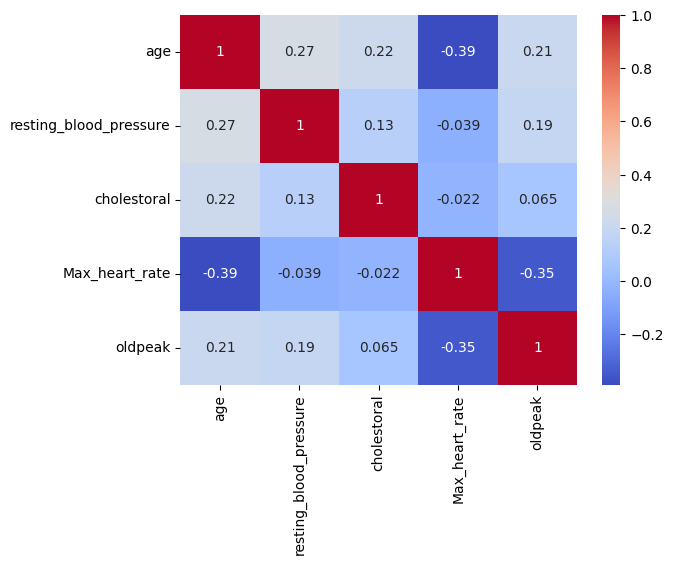

In [25]:
# 시각화
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()